In [1]:
# watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI
# your cleaned data after you complete this analysis: 
# upload to: https://docs.google.com/forms/d/e/1FAIpQLScVuy4aSiSSpLfUOxbmutWtcUidfkzPDc-C0J2gy6Y8TXqeHQ/viewform

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(550, 2)

In [3]:
df.head()

,Time,domain
0,2022-07-17 07:05:56,www.primevideo.com
1,2022-07-17 07:05:56,www.primevideo.com
2,2022-07-17 07:05:53,www.primevideo.com
3,2022-06-23 06:28:45,game.ilsworld.com
4,2022-06-23 01:22:20,game.ilsworld.com


In [4]:
df.tail()

,Time,domain
545,1600-12-31 19:00:00,www.dailymotion.com
546,1600-12-31 19:00:00,www.google.co.in
547,1600-12-31 19:00:00,www.google.co.in
548,1600-12-31 19:00:00,www.khanacademy.org
549,1600-12-31 19:00:00,4movierulz.wf


In [5]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [6]:
df.dropna( inplace=True)

In [7]:
df.dtypes

Time      object
domain    object
dtype: object

In [8]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

18

In [9]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [10]:
df['Time'] = pd.to_datetime(df['Time'])

In [11]:
# df['domain'] = df['domain'].astype(str)

In [12]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [13]:
df.head()

,Time,domain
0,2022-07-17 07:05:56,www.primevideo.com
1,2022-07-17 07:05:56,www.primevideo.com
2,2022-07-17 07:05:53,www.primevideo.com
3,2022-06-23 06:28:45,game.ilsworld.com
4,2022-06-23 01:22:20,game.ilsworld.com


In [14]:
df['domain'].value_counts()[:50]

www.youtube.com                            191
outlook.office.com                          91
game.ilsworld.com                           87
euclid-mu.in                                25
mahindraecolecentrale-my.sharepoint.com     20
lms.ecornell.com                            14
www.google.com                              12
muerp.mahindrauniversity.edu.in             11
login.microsoftonline.com                   10
www.primevideo.com                          10
mahindraecolecentrale.unicampus.in           8
portal.ecornell.com                          7
portal.ecornell.cornell.edu                  6
ecornell.secure.force.com                    5
retail.onlinesbi.com                         4
us05web.zoom.us                              4
auth-cl.ecornell.com                         3
ecornell.cornell.edu                         3
ww1.soap2dayhd.co                            2
docs.google.com                              2
us04web.zoom.us                              2
www.instagram

<AxesSubplot:>

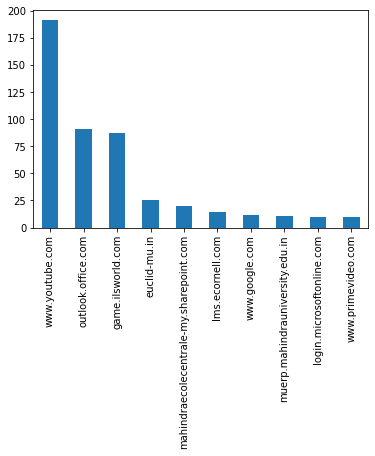

In [15]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [16]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     50
1     73
2      9
5     35
6     39
7     17
8     41
10    55
11    38
12     6
13    13
14    28
15    14
16     1
22    68
23    45
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

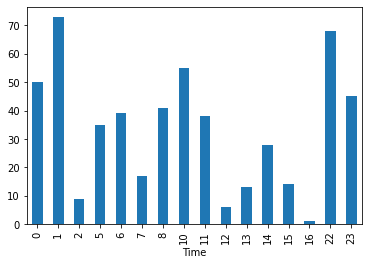

In [17]:
hourly_counts.plot.bar()

In [18]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2022-07-17 07:05:56,www.primevideo.com,Sunday,6
1,2022-07-17 07:05:56,www.primevideo.com,Sunday,6
2,2022-07-17 07:05:53,www.primevideo.com,Sunday,6
3,2022-06-23 06:28:45,game.ilsworld.com,Thursday,3
4,2022-06-23 01:22:20,game.ilsworld.com,Thursday,3


In [19]:
df['Day'].value_counts()

Thursday     241
Sunday       116
Tuesday       65
Saturday      49
Friday        25
Monday        20
Wednesday     16
Name: Day, dtype: int64

In [20]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0     20
1     65
2     16
3    241
4     25
5     49
6    116
Name: DayIndex, dtype: int64

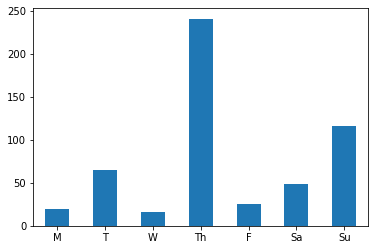

In [21]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [22]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-07-17 07:05:56,www.primevideo.com,Sunday,6,True
1,2022-07-17 07:05:56,www.primevideo.com,Sunday,6,True
2,2022-07-17 07:05:53,www.primevideo.com,Sunday,6,True
3,2022-06-23 06:28:45,game.ilsworld.com,Thursday,3,False
4,2022-06-23 01:22:20,game.ilsworld.com,Thursday,3,False


In [23]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [24]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-07-17 07:05:56,www.primevideo.com,Sunday,6,True
1,2022-07-17 07:05:56,www.primevideo.com,Sunday,6,True
2,2022-07-17 07:05:53,www.primevideo.com,Sunday,6,True
12,2022-06-19 07:03:10,www.youtube.com,Sunday,6,True
13,2022-06-19 07:03:02,web.whatsapp.com,Sunday,6,True


In [25]:
weekday['domain'].value_counts()[:5]

www.youtube.com                            138
game.ilsworld.com                           74
outlook.office.com                          45
mahindraecolecentrale-my.sharepoint.com     20
lms.ecornell.com                            14
Name: domain, dtype: int64

In [26]:
weekend['domain'].value_counts()[:5]

www.youtube.com                    53
outlook.office.com                 46
euclid-mu.in                       21
game.ilsworld.com                  13
muerp.mahindrauniversity.edu.in    11
Name: domain, dtype: int64

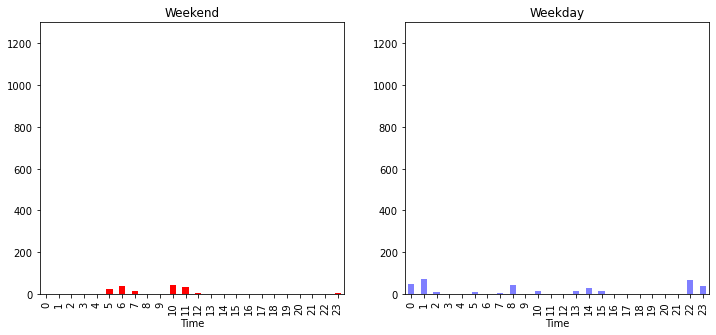

In [27]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 1300])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()


In [28]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply because there are more weekdays 

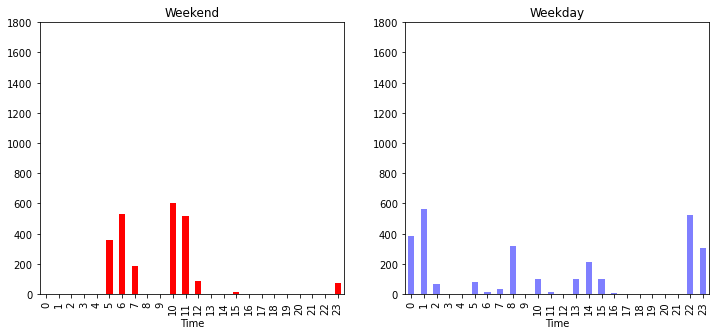

In [29]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

In [30]:
df['domain'].value_counts()[:10]

www.youtube.com                            191
outlook.office.com                          91
game.ilsworld.com                           87
euclid-mu.in                                25
mahindraecolecentrale-my.sharepoint.com     20
lms.ecornell.com                            14
www.google.com                              12
muerp.mahindrauniversity.edu.in             11
login.microsoftonline.com                   10
www.primevideo.com                          10
Name: domain, dtype: int64

In [31]:
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

# get_data_for_domain('youtube')

In [32]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

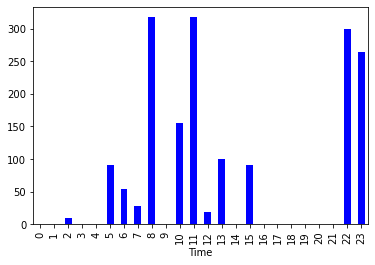

In [40]:
_= show_domain_stats('youtube', 'blue')

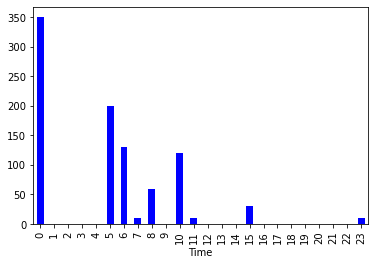

In [41]:
_= show_domain_stats('outlook', 'blue')

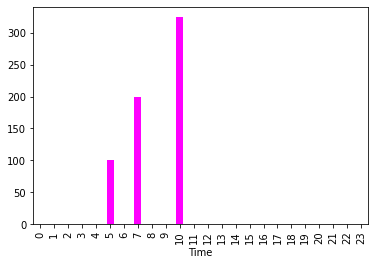

In [42]:
_ = show_domain_stats('euclid', 'magenta')


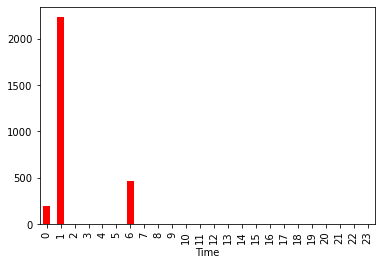

In [43]:
_ = show_domain_stats('ilsworld', 'red')

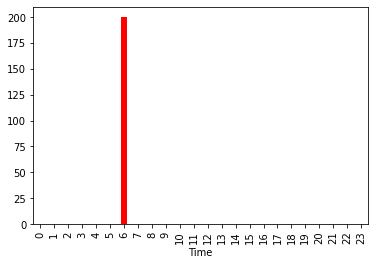

In [37]:
_ = show_domain_stats('netflix', 'red')

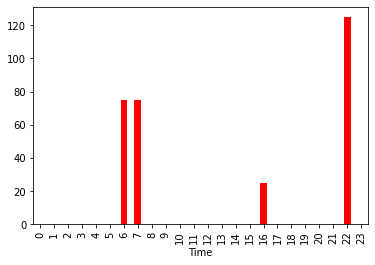

In [38]:
_ = show_domain_stats('netflix|disney|prime', 'red')

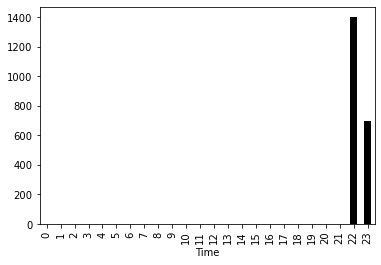

In [44]:
_=show_domain_stats('ecornell', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here

1.personal computer

2.no he is not employed

3.working on outlink,working on his assignments in euclid and youtube steaming

4.Based on this data he is working on his assignment on thursday and watching youtube on sunday
  he is working on the system on weekdays when compared to weekends
  And he is working more time in the morning when compared to the evening